In [43]:
from tensorflow.keras import layers, models, datasets
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [44]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [45]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [46]:
#One Hot Encoding Labels from Train/Test Dataset

num_classes = 10

train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [47]:
# split data

train_images, val_images, train_labels, val_labels = train_test_split(train_images,train_labels, test_size=0.1, random_state=42)

## Model 1: test 83%, val 84%

In [7]:
base_model = MobileNet(include_top=False,
                       weights='imagenet',
                       input_shape=None,
                       classes=train_labels.shape[1])


# base_model = MobileNet(weights='imagenet',include_top=False)

17225924/17225924 [==============================] - 1s 0us/step


In [9]:
image_size = (224, 224)

model = Sequential()

model.add(tf.keras.layers.Resizing(image_size[0], image_size[1], interpolation="bilinear", input_shape=train_images.shape[1:]))

model.add(base_model)
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation=('relu')))
model.add(Dense(256,activation=('relu')))
model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
model.add(Dropout(.2))
model.add(Dense(10,activation=('softmax')))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 1024)        0         
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               25690624  
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                      

In [11]:
# as this model has 10 classes, it is advisable to use "categorical_crossentropy"

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [12]:
history_1 = model.fit(train_images, train_labels,
                      batch_size = 100, epochs = 5,
                      validation_split=0.3)
                    # validation_data=(test_images, test_labels_one_hot))

Epoch 1/5
315/315 [==============================] - 193s 522ms/step - loss: 1.2114 - accuracy: 0.6896 - val_loss: 1.0044 - val_accuracy: 0.7395
Epoch 2/5
315/315 [==============================] - 156s 494ms/step - loss: 0.4556 - accuracy: 0.8623 - val_loss: 0.4936 - val_accuracy: 0.8393
Epoch 3/5
315/315 [==============================] - 163s 519ms/step - loss: 0.3284 - accuracy: 0.8994 - val_loss: 0.4224 - val_accuracy: 0.8656
Epoch 4/5
315/315 [==============================] - 162s 515ms/step - loss: 0.2606 - accuracy: 0.9189 - val_loss: 0.5853 - val_accuracy: 0.8408
Epoch 5/5
315/315 [==============================] - 164s 519ms/step - loss: 0.2273 - accuracy: 0.9314 - val_loss: 0.5191 - val_accuracy: 0.8396


In [14]:
# for history_1

loss, accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("Evaluate on test data, optimizer: adam, loss: categorical_crossentropy")

print("Accuracy for test data: {:.2f}%".format(accuracy))
print("Loss for test data : {:.2f}%".format(loss))

313/313 - 11s - loss: 0.5437 - accuracy: 0.8348 - 11s/epoch - 34ms/step
Evaluate on test data, optimizer: adam, loss: categorical_crossentropy
Accuracy for test data: 0.83%
Loss for test data : 0.54%


In [15]:
loss_valid, accuracy_valid = model.evaluate(valid_images, valid_labels, verbose=2)
print("Evaluate on validation data, optimizer: adam, loss: categorical_crossentropy")

print("Accuracy for valid. data: {:.2f}%".format(accuracy_valid))
print("Loss for valid. data : {:.2f}%".format(loss_valid))

157/157 - 5s - loss: 0.5066 - accuracy: 0.8440 - 5s/epoch - 32ms/step
Evaluate on validation data, optimizer: adam, loss: categorical_crossentropy
Accuracy for valid. data: 0.84%
Loss for valid. data : 0.51%


In [ ]:
acc = history_1 .history['accuracy']
val_acc = history_1 .history['val_accuracy']
loss = history_1 .history['loss']
val_loss = history_1 .history['val_loss']

epoch_range = range(len(acc))

plt.plot(epoch_range, acc, label='Training accuracy')
plt.plot(epoch_range, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
print("Generate predictions for 3 samples")
predictions = model.predict(test_images[:3])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
1/1 [==============================] - 0s 21ms/step
predictions shape: (3, 10)


## Model 2: test 80%, val 79%

In [19]:
base_model_2 = MobileNet(include_top=False,
                         weights='imagenet',
                         input_shape=None,
                         classes=train_labels.shape[1])

In [20]:
image_size = (224, 224)

model_2 = Sequential()

model_2.add(tf.keras.layers.Resizing(image_size[0], image_size[1], interpolation="bilinear", input_shape=train_images.shape[1:]))

model_2.add(base_model_2)
model_2.add(Dropout(0.3))
model_2.add(Flatten())
model_2.add(Dense(512,activation=('relu')))
model_2.add(Dropout(.3))
model_2.add(Dense(10,activation=('softmax')))

In [21]:
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [22]:
histotry_2 = model_2.fit(train_images, train_labels,
                         batch_size = 100, epochs = 5,
                         validation_split = 0.3)

Epoch 1/5
315/315 [==============================] - 169s 492ms/step - loss: 1.9864 - accuracy: 0.7077 - val_loss: 0.5115 - val_accuracy: 0.8278
Epoch 2/5
315/315 [==============================] - 154s 490ms/step - loss: 0.3887 - accuracy: 0.8740 - val_loss: 0.5593 - val_accuracy: 0.8247
Epoch 3/5
315/315 [==============================] - 154s 489ms/step - loss: 0.2704 - accuracy: 0.9137 - val_loss: 0.5765 - val_accuracy: 0.8233
Epoch 4/5
315/315 [==============================] - 154s 488ms/step - loss: 0.2197 - accuracy: 0.9296 - val_loss: 0.6266 - val_accuracy: 0.8225
Epoch 5/5
315/315 [==============================] - 154s 489ms/step - loss: 0.1894 - accuracy: 0.9404 - val_loss: 0.7184 - val_accuracy: 0.8018


In [23]:
# for history_2

loss_2, accuracy_2 = model_2.evaluate(test_images, test_labels, verbose=2)
print("Evaluate on test data, optimizer: adam, loss: categorical_crossentropy")

print("Accuracy for test data: {:.2f}%".format(accuracy_2))
print("Loss for test data : {:.2f}%".format(loss_2))

313/313 - 10s - loss: 0.7307 - accuracy: 0.8000 - 10s/epoch - 32ms/step
Evaluate on test data, optimizer: adam, loss: categorical_crossentropy
Accuracy for test data: 0.80%
Loss for test data : 0.73%


In [24]:
loss_valid_2, accuracy_valid_2 = model_2.evaluate(valid_images, valid_labels, verbose=2)
print("Evaluate on validation data, optimizer: adam, loss: categorical_crossentropy")

print("Accuracy for valid. data: {:.2f}%".format(accuracy_valid_2))
print("Loss for valid. data : {:.2f}%".format(loss_valid_2))

157/157 - 5s - loss: 0.7372 - accuracy: 0.7938 - 5s/epoch - 32ms/step
Evaluate on validation data, optimizer: adam, loss: categorical_crossentropy
Accuracy for valid. data: 0.79%
Loss for valid. data : 0.74%


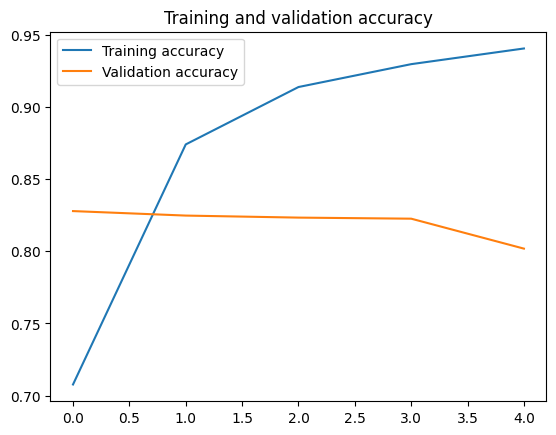

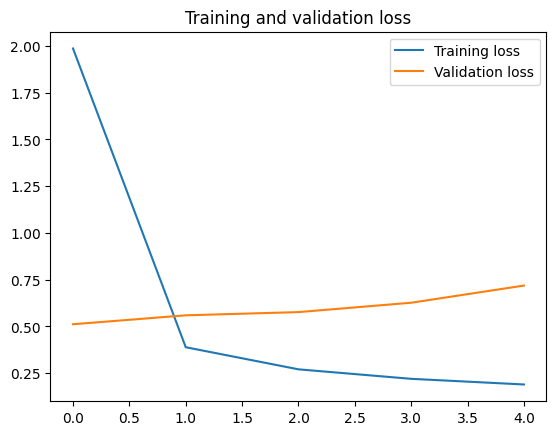

In [26]:
acc = histotry_2 .history['accuracy']
val_acc = histotry_2 .history['val_accuracy']
loss = histotry_2 .history['loss']
val_loss = histotry_2 .history['val_loss']

epoch_range = range(len(acc))

plt.plot(epoch_range, acc, label='Training accuracy')
plt.plot(epoch_range, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Model 4: test 89%, val 91%

In [52]:
model_base_4 = MobileNet(weights='imagenet',include_top=False)

In [53]:
from keras.layers import GlobalAveragePooling2D

image_size = (224,224)

model4 = Sequential()
model4.add(tf.keras.layers.Resizing(image_size[0], image_size[1], interpolation="bilinear", input_shape=train_images.shape[1:]))
model4.add(model_base_4)
model4.add(GlobalAveragePooling2D())
model4.add(Dense(1024, activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_8 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  
 nal)                                                            
                                                                 
 global_average_pooling2d_4   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_20 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_21 (Dense)            (None, 128)               131200    
                                                                 
 dropout_12 (Dropout)        (None, 128)              

In [54]:
history4 = model4.fit(train_images, train_labels, batch_size = 64, epochs = 5, validation_data=(val_images, val_labels))

Epoch 1/5
704/704 [==============================] - 169s 219ms/step - loss: 0.7007 - accuracy: 0.7854 - val_loss: 0.4837 - val_accuracy: 0.8318
Epoch 2/5
704/704 [==============================] - 154s 218ms/step - loss: 0.3949 - accuracy: 0.8799 - val_loss: 0.4311 - val_accuracy: 0.8678
Epoch 3/5
704/704 [==============================] - 154s 218ms/step - loss: 0.2939 - accuracy: 0.9105 - val_loss: 0.3843 - val_accuracy: 0.8846
Epoch 4/5
704/704 [==============================] - 154s 218ms/step - loss: 0.2320 - accuracy: 0.9270 - val_loss: 0.3515 - val_accuracy: 0.8924
Epoch 5/5
704/704 [==============================] - 154s 219ms/step - loss: 0.1927 - accuracy: 0.9391 - val_loss: 0.3327 - val_accuracy: 0.8990


In [55]:
batch_size = 256

test_loss4, test_accuracy4 = model4.evaluate(test_images, test_labels, batch_size=batch_size)
print("Test Loss:{:.2f}%".format(test_loss4))
print("Test Accuracy: {:.2f}%".format(test_accuracy4))

40/40 [==============================] - 9s 222ms/step - loss: 0.3585 - accuracy: 0.8936
Test Loss:0.36%
Test Accuracy: 0.89%


In [56]:
val_loss4, val_accuracy4 = model4.evaluate(val_images, val_labels, verbose=2)
print("Valid. Loss:{:.2f}%".format(val_loss4))
print("Valid. Accuracy:{:.2f}%".format(val_accuracy4))

157/157 - 5s - loss: 0.3327 - accuracy: 0.8990 - 5s/epoch - 30ms/step
Valid. Loss:0.33%
Valid. Accuracy:0.90%


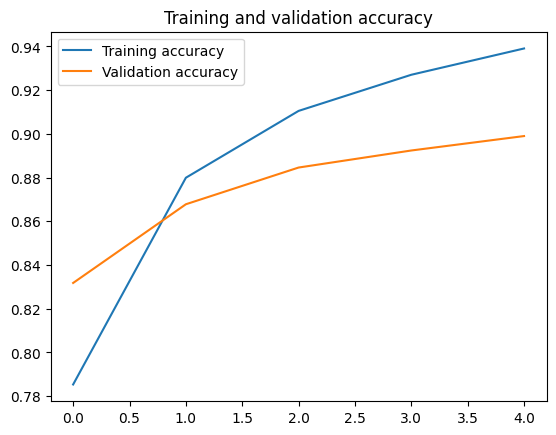

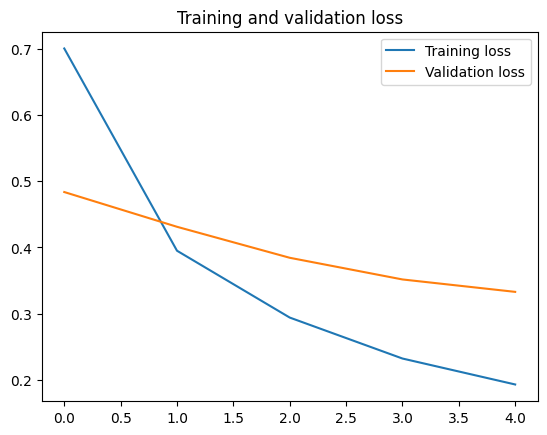

In [57]:
acc = history4 .history['accuracy']
val_acc = history4 .history['val_accuracy']
loss = history4 .history['loss']
val_loss = history4 .history['val_loss']

epoch_range = range(len(acc))

plt.plot(epoch_range, acc, label='Training accuracy')
plt.plot(epoch_range, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()